# Análise da diferença salarial para trabalhadores de TI conforme suas ocupações (CBOs).

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres
com funções trabalhistas de TI distribuídos em qualquer setor produtivo no Brasil, 
conforme divisão das ocupações específicas selecionadas em 2021.

## Etapas iniciais para realização das análises:

### Imports necessários para realização dos processamentos e análises:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [2]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices de resumo do nome das CBOs para :
cbo = {'1236': '1236 - Diretoria', '1425': '1425 - Gerência', 
       '2122': '2122 - Engenharia', '2123': '2123 - Analistas', 
       '2124': '2124 - Técnicos', '3171': '3171 - Suporte', 
       '3172': '3172 - Administradores'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

### Etapa de leitura dos dados das tabelas em CSV:

In [3]:
#Leitura da tabela de dados gerais:
RAIS_GERAL_2021 = pd.read_csv("C:/Users/leila/estagio/data/raw/DATA_RAIS_GERAL_2021.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2021.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de CBO para utilização correta:

In [4]:
# Convertendo a coluna CBO de int64 para string
RAIS_GERAL_2021['CBO'] = RAIS_GERAL_2021['CBO'].apply(str)

# Extraindo somente os 4 primeiros caracteres (Família CBO)
RAIS_GERAL_2021['CBO'] = RAIS_GERAL_2021["CBO"].str[0:4]


### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [5]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2021
# até 09/2023 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2021 = 1.01122970

RAIS_GERAL_2021["Remuneração"] = RAIS_GERAL_2021["Remuneração"] * fator_correcao_inflacao_2021

### Exibição da tabela geral:

In [6]:
# Exibindo os cinco primeiros dados da tabela:
RAIS_GERAL_2021.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,3172,85201,1,21,8,"1,372.23",1
1,MS,3172,85201,1,22,9,"1,338.76",1
2,MS,3172,85201,1,20,9,"1,405.69",1
3,MS,2124,72100,1,22,8,"4,550.53",1
4,MS,3172,47717,1,30,8,"5,256.67",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme ocupações específicas (CBOs):

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [7]:
# Tabela principal para quantidade:
RAIS_GERAL_2021_QNT = pd.crosstab(RAIS_GERAL_2021["CBO"].replace(cbo), RAIS_GERAL_2021["Sexo"].replace(sexo))
RAIS_GERAL_2021_QNT.insert(1, "% Fem.", RAIS_GERAL_2021_QNT["Fem."] / (RAIS_GERAL_2021_QNT["Fem."] + RAIS_GERAL_2021_QNT["Masc."]) * 100)
RAIS_GERAL_2021_QNT.insert(3, "% Masc.", RAIS_GERAL_2021_QNT["Masc."] / (RAIS_GERAL_2021_QNT["Fem."] + RAIS_GERAL_2021_QNT["Masc."]) * 100)

RAIS_GERAL_2021_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
CBO,,,,
1236 - Diretoria,482,14.83,2769,85.17
1425 - Gerência,12631,21.52,46063,78.48
2122 - Engenharia,2262,14.21,13658,85.79
2123 - Analistas,6121,19.26,25659,80.74
2124 - Técnicos,82818,21.58,300915,78.42
3171 - Suporte,12731,13.84,79267,86.16
3172 - Administradores,22907,24.12,72049,75.88


In [8]:
# Tabela para gráfico da quantidade:
RAIS_GERAL_2021_QNT["Total"] = RAIS_GERAL_2021_QNT["% Masc."] + RAIS_GERAL_2021_QNT["% Fem."]
RAIS_GERAL_2021_QNT["Ano"] = "2021"

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2021_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

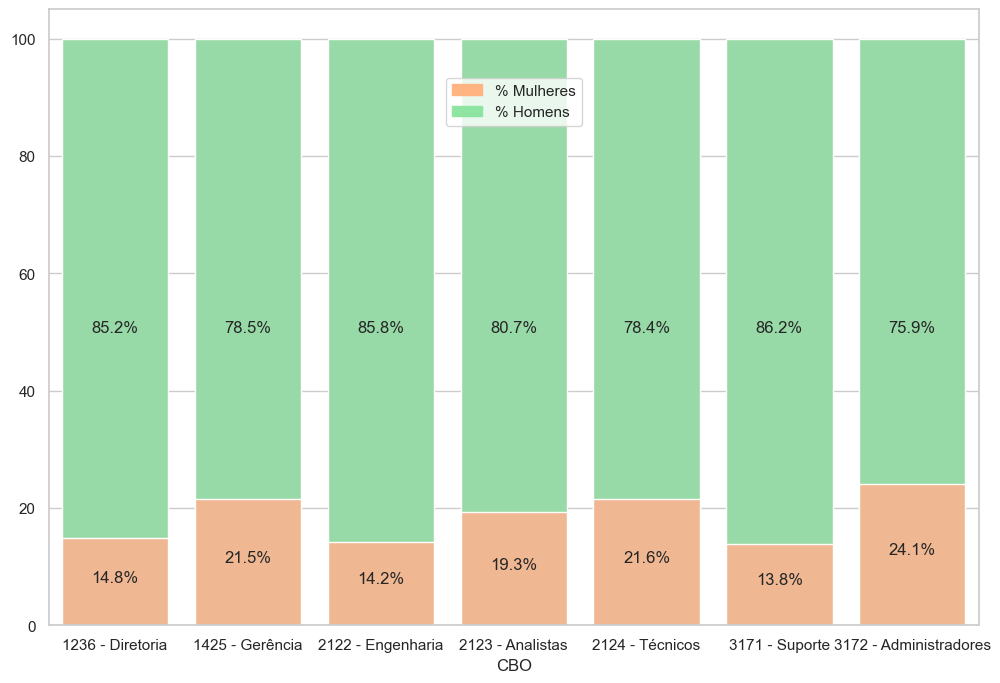

In [115]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize=(12, 8))

# Configuração da grid da imagem:
sns.set(style="whitegrid")

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x="CBO", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2021": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][i]), (x, y), ha='center')
   

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x="CBO", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2021": color_fem})

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(.45, .8, .1, .1))

# Adicionar rótulos com as porcentagens femininas nas barras
for i in bar2.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    if height < 100.0:
        bar2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

plt.ylabel('')  # Remover o título do eixo y

plt.savefig("C:/Users/leila/estagio/data/figures/svg/qnt_sexo_cbo.svg")

## Análise das diferenças salariais conforme cada ocupação específica (CBOs):

### Distribuição da remuneração para cada sexo cruzado pela CBO:

In [10]:
# Criação da tabela para o boxplot
RAIS_GERAL_2021_BOX = RAIS_GERAL_2021
RAIS_GERAL_2021_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2021_BOX["CBO"].replace(cbo, inplace = True)

RAIS_GERAL_2021_BOX

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,3172 - Administradores,85201,1,21,8,"1,372.23",Masc.
1,MS,3172 - Administradores,85201,1,22,9,"1,338.76",Masc.
2,MS,3172 - Administradores,85201,1,20,9,"1,405.69",Masc.
3,MS,2124 - Técnicos,72100,1,22,8,"4,550.53",Masc.
4,MS,3172 - Administradores,47717,1,30,8,"5,256.67",Masc.
...,...,...,...,...,...,...,...,...
680327,RS,2124 - Técnicos,62040,11,28,2,"14,102.01",Fem.
680328,RS,2124 - Técnicos,62040,11,39,2,"10,972.72",Fem.
680329,RS,2122 - Engenharia,62015,11,37,2,"5,056.15",Fem.
680330,RS,2124 - Técnicos,62023,11,41,8,"4,664.91",Fem.


C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

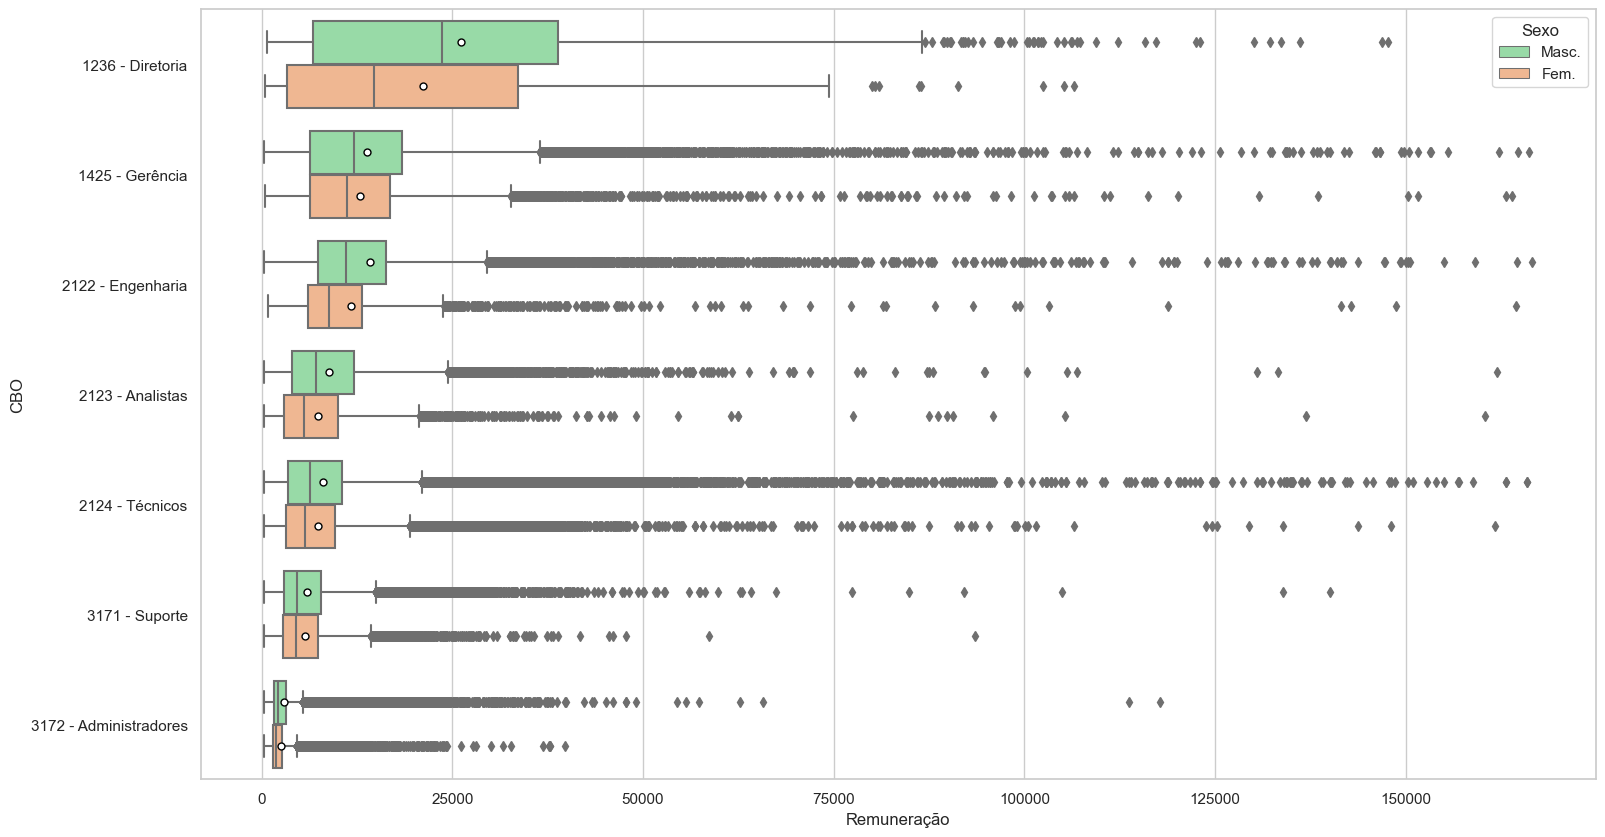

In [11]:
# Criação do boxplot:
box = sns.boxplot(x = 'Remuneração', y = 'CBO', hue = 'Sexo', data = RAIS_GERAL_2021, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = cbo.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(18, 10)
box.figure.savefig("C:/Users/leila/estagio/data/figures/png/boxplot_sexo_cbo_2021.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:

In [13]:
# Tabela principal para média e diferença salarial:
RAIS_GERAL_2021_MEDIA = pd.crosstab(RAIS_GERAL_2021["CBO"].replace(cbo), RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2021_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2021_MEDIA["Fem."] - RAIS_GERAL_2021_MEDIA["Masc."]) / RAIS_GERAL_2021_MEDIA["Masc."]) * 100)

RAIS_GERAL_2021_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1236 - Diretoria,"21,128.63","26,125.72",-19.13
1425 - Gerência,"12,824.53","13,783.10",-6.95
2122 - Engenharia,"11,668.71","14,168.29",-17.64
2123 - Analistas,"7,407.74","8,831.90",-16.13
2124 - Técnicos,"7,328.36","7,981.59",-8.18
3171 - Suporte,"5,625.75","5,908.40",-4.78
3172 - Administradores,"2,481.28","2,925.86",-15.19


In [14]:
RAIS_GERAL_2021_MEDIA["Ano"] = "2021"

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2021_MEDIA]).reset_index()

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

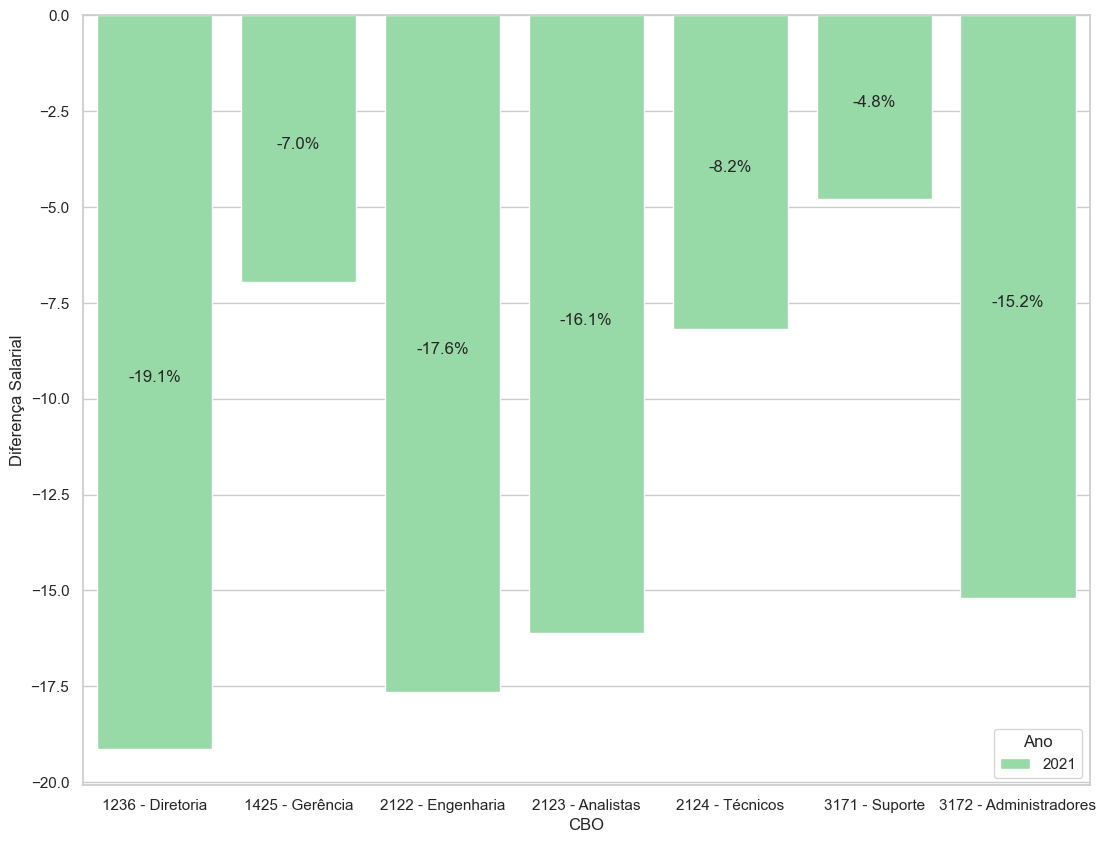

In [15]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "CBO", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2021": color_fem,"2021": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("C:/Users/leila/estagio/data/figures/svg/dif_salarial_sexo_cbo_media.svg")

In [16]:
# Tabela principal para mediana e diferença salarial:
RAIS_GERAL_2021_MEDIANA = pd.crosstab(RAIS_GERAL_2021["CBO"].replace(cbo), RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'median')
RAIS_GERAL_2021_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2021_MEDIANA["Fem."] - RAIS_GERAL_2021_MEDIANA["Masc."]) / RAIS_GERAL_2021_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2021_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1236 - Diretoria,"14,746.94","23,595.36",-37.50
1425 - Gerência,"11,123.53","12,146.89",-8.42
2122 - Engenharia,"8,885.29","11,055.25",-19.63
2123 - Analistas,"5,499.56","7,165.56",-23.25
2124 - Técnicos,"5,607.63","6,288.02",-10.82
3171 - Suporte,"4,428.98","4,646.06",-4.67
3172 - Administradores,"1,884.83","2,150.88",-12.37


In [17]:
RAIS_GERAL_2021_MEDIANA["Ano"] = "2021"

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2021_MEDIANA]).reset_index()

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

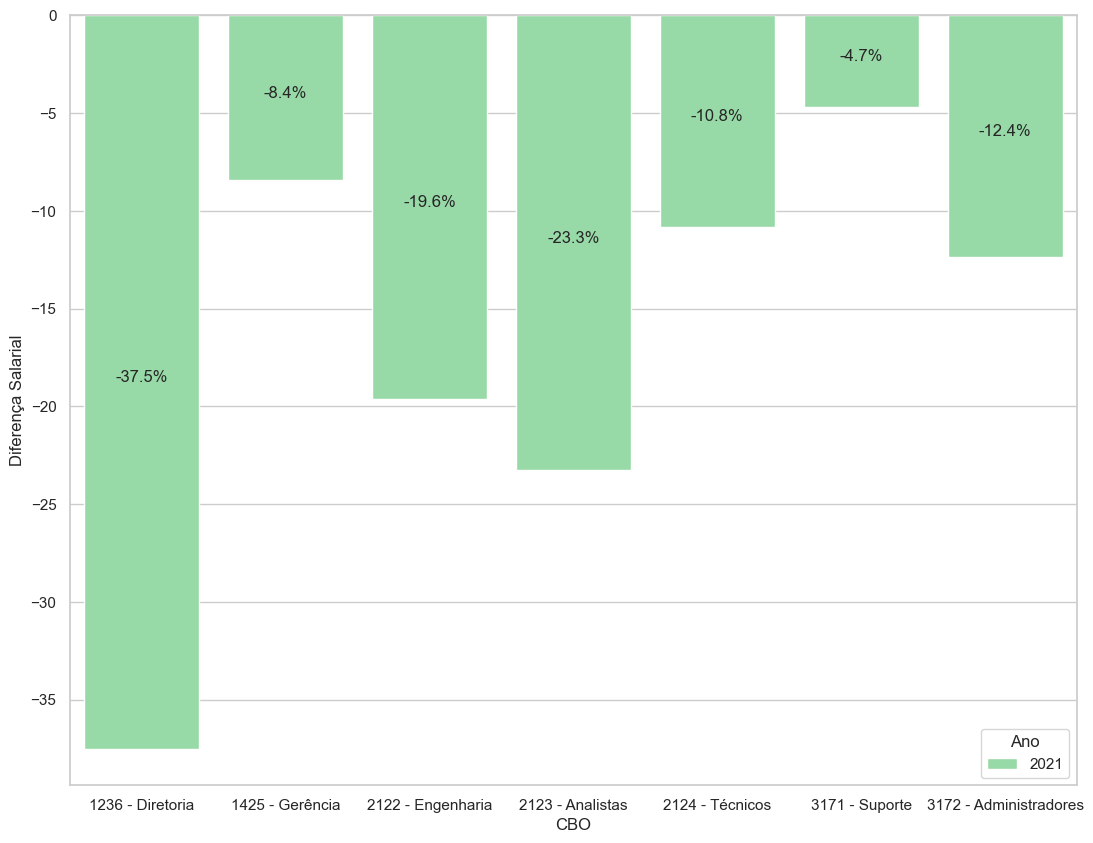

In [18]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "CBO", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2021": color_fem,"2021": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("C:/Users/leila/estagio/data/figures/svg/dif_salarial_sexo_cbo_mediana.svg")

### Teste de hipótese para cada grupo de médias por CBOs:

In [19]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [20]:
TESTE_HIP_2021 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for ocup in cbo:
    df1 = RAIS_GERAL_2021.query("Sexo == 'Masc.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    df2 = RAIS_GERAL_2021.query("Sexo == 'Fem.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    
    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2021.loc[cbo[ocup]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2021_HIP = pd.merge(RAIS_GERAL_2021_MEDIA, TESTE_HIP_2021, left_index=True, right_index=True)
RAIS_GERAL_2021_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2021_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2021_HIP.head(7)


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
CBO,,,,,
1236 - Diretoria,"21,128.63","26,125.72",556039.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
1425 - Gerência,"12,824.53","13,783.10",274033449.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
2122 - Engenharia,"11,668.71","14,168.29",12557084.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
2123 - Analistas,"7,407.74","8,831.90",65629232.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
2124 - Técnicos,"7,328.36","7,981.59",11606955759.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
3171 - Suporte,"5,625.75","5,908.40",485146779.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
3172 - Administradores,"2,481.28","2,925.86",701281883.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
